**The objective of this question is to explore relationships between vehicle characteristics and
performance metrics such as fuel efficiency and price using the Automobile dataset from UCI repository.** 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
column_names_auto = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", "body_style", "drive_wheels", 
                     "engine_location", "wheel_base", "length", "width", "height", "curb_weight", "engine_type", "num_of_cylinders", 
                     "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", 
                     "highway_mpg", "price"]

auto_data = pd.read_csv(url, header=None, names=column_names_auto, na_values="?")
auto_data.dropna(inplace=True)

**(a)** Implement a function that generates a heatmap to visualize city-mpg for different combinations of 'make' and 'body style'

In [5]:
def plot_city_mpg_by_make_and_body_style(df_data):
    pivot_table = df_data.pivot_table(index="make", columns="body_style", values="city_mpg", aggfunc="mean")
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f", linewidths=0.5, linecolor="white", cbar=True, mask=pivot_table.isna(), vmin=15, vmax=45, center=27)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(0.2)  

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.title("City MPG by Make and Body Style")
    plt.xlabel("body_style")
    plt.ylabel("make")
    plt.show()


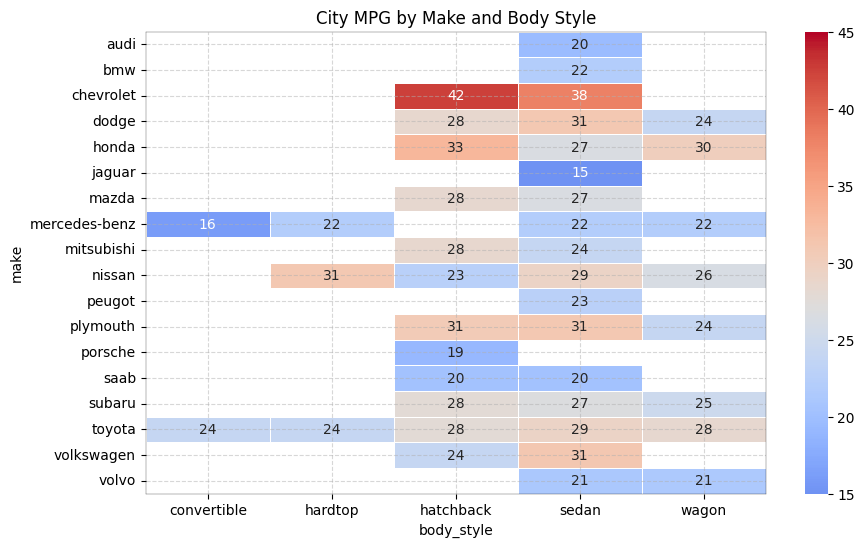

In [6]:
plot_city_mpg_by_make_and_body_style(auto_data)

**(b)** Implement a function to create scatter plots that examine the relationship between ‘highway mpg‘ and ‘price‘ for each
fuel type.

In [7]:
custom_color = {
    "three": "red", "four": "blue", "five": "orange", "six": "green", "eight": "purple"
}
custom_size= {
    "three": 60, "four": 90, "five": 80, "six": 70, "eight": 50
}
def plot_highway_mpg_vs_price(df_data, fuel_type):

    fuel_data = df_data[df_data["fuel_type"] == fuel_type]
    fuel_data["price"] = pd.to_numeric(fuel_data["price"])
    fuel_data["num_of_cylinders"] = fuel_data["num_of_cylinders"].str.lower()
    fuel_data["size"] = fuel_data["num_of_cylinders"].map(custom_size)
    
    plt.figure(figsize=(10, 6))
    
    ax=sns.scatterplot(data=fuel_data, x="highway_mpg", y="price", hue="num_of_cylinders", palette=custom_color, size="size", sizes=(50, 150), legend="auto")
    
    handles, labels = ax.get_legend_handles_labels()
    new_handles, new_labels = [], []
    for h, l in zip(handles, labels):
        if l in custom_color:  
            new_handles.append(h)
            new_labels.append(l)

    plt.legend(new_handles, new_labels, title="num_of_cylinders")
    plt.xlabel("highway_mpg")
    plt.ylabel("price")
    plt.title(f"Highway MPG vs Price for {fuel_type.capitalize()} Cars")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13160\3574969138.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_data["price"] = pd.to_numeric(fuel_data["price"])
C:\Users\hp\AppData\Local\Temp\ipykernel_13160\3574969138.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_data["num_of_cylinders"] = fuel_data["num_of_cylinders"].str.lower()
C:\Users\hp\AppData\Local\Temp\ipykernel_13160\3574969138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

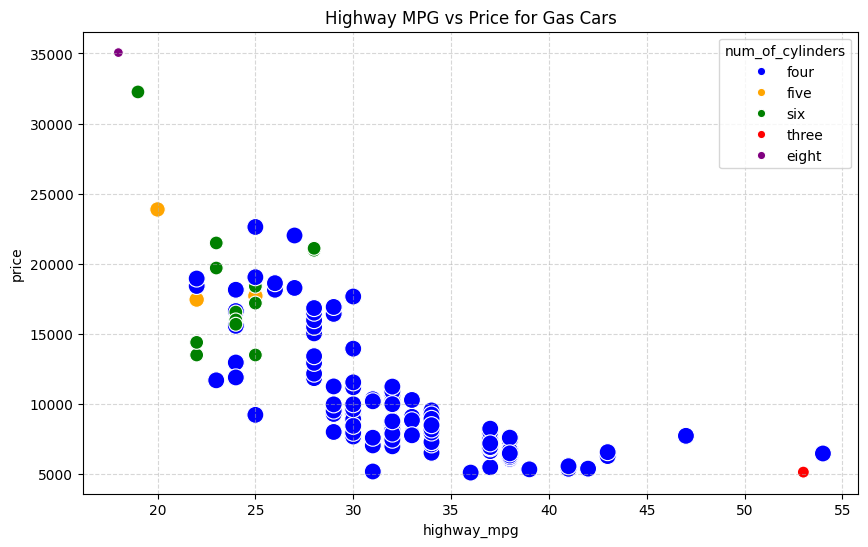

C:\Users\hp\AppData\Local\Temp\ipykernel_13160\3574969138.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_data["price"] = pd.to_numeric(fuel_data["price"])
C:\Users\hp\AppData\Local\Temp\ipykernel_13160\3574969138.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_data["num_of_cylinders"] = fuel_data["num_of_cylinders"].str.lower()
C:\Users\hp\AppData\Local\Temp\ipykernel_13160\3574969138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

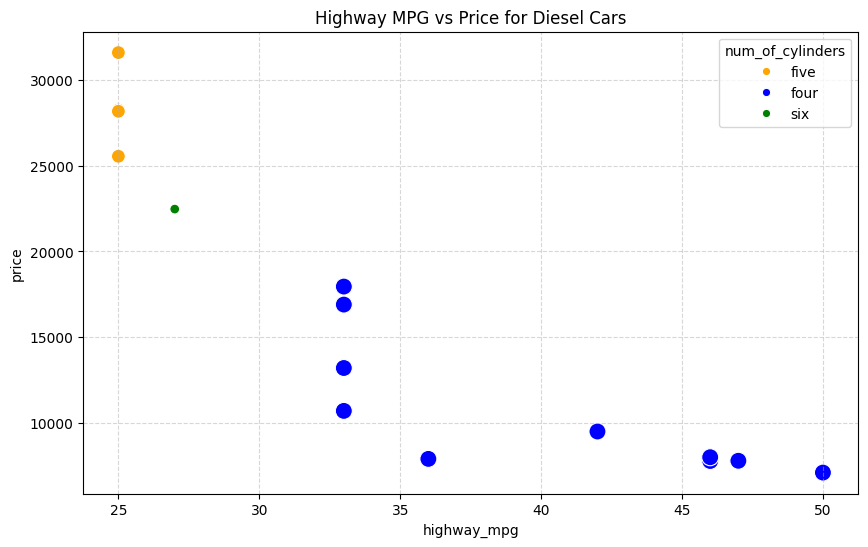

In [8]:
plot_highway_mpg_vs_price(auto_data, "gas")
plot_highway_mpg_vs_price(auto_data, "diesel")